# LAB-3
# Name: Raghavendra Deshmukh
# StudenID: 8854506
### PART-A

**Problem Statement:** Consider the dataset Credit Card Fraud Detection from Kaggle and build a machine-learning model that detects whether a credit card transaction is fraudulent. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using the logistic regression to build the model, and evaluate to determine the accuracy.

In [ ]:
# importing libraries


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error
rom sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Load the dataset

In [2]:
credit_data_df = pd.read_csv('creditcard.csv')
credit_data_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Explore the dataset

In [ ]:
credit_data_df.shape

In [ ]:
credit_data_df.info

In [ ]:
credit_data_df.describe

In [6]:
credit_data_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [20]:
# 0 states the normal transcation and 1 states that the fraud transcations
print(credit_data_df['Class'].value_counts())

0    283253
1       473
Name: Class, dtype: int64



Data preprocessing

In [7]:
# Lets remove the duplicates 

print("Number of duplicate rows:", credit_data_df.duplicated().sum())

Number of duplicate rows: 1081


In [10]:
# Remove duplicate rows
credit_data_df.drop_duplicates(inplace=True)


# Reset the index now
credit_data_df.reset_index(drop=True, inplace=True)

In [12]:
print("Number of duplicate rows after cleaning:", credit_data_df.duplicated().sum())

Number of duplicate rows after cleaning: 0


In [15]:
# dropping the missing values 
credit_data_df.dropna(inplace=True)

In [21]:
print('Normal transactions count', len(credit_data_df[credit_data_df.Class == 0]))
print('Fraud transactions count', len(credit_data_df[credit_data_df.Class == 1]))

Normal transactions count 283253
Fraud transactions count 473


In [22]:
# Separate features (X) and target variable (y)
X = credit_data_df.drop('Class', axis=1)
y = credit_data_df['Class']

In [23]:
# Scale the features (except the 'Class' column)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split the dataset in training set (70%) and a testing set (30%)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=38)

Training the model

In [28]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

Predict the model

In [29]:
y_pred = log_reg.predict(X_test)

Evaluate the model

In [30]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9991423670668954
Confusion Matrix:
 [[84962    11]
 [   62    83]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84973
           1       0.88      0.57      0.69       145

    accuracy                           1.00     85118
   macro avg       0.94      0.79      0.85     85118
weighted avg       1.00      1.00      1.00     85118



**Conclusion**

The model demonstrates an impressive accuracy of 99.91%. Nevertheless, when working with imbalanced datasets, such as credit card fraud detection where non-fraudulent transactions significantly outnumber fraudulent ones, relying solely on accuracy might not be adequate.

To gain a deeper understanding of the model's performance, we examine the confusion matrix. It reveals the specific types of errors the model is encountering. In particular, there were 60 fraudulent transactions incorrectly classified as non-fraudulent (false negatives), and 11 non-fraudulent transactions mistakenly classified as fraudulent (false positives).

### PART-B

**Problem Statement:** Use the following insurance dataset and build a predictive system to predict insurance costs. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using linear regression to build the model, and evaluate the accuracy of predicting the insurance cost.

Load the dataset

In [52]:
# Load the dataset
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


**Explore the dataset**

In [37]:
print(insurance_df.shape)
print(insurance_df.info)
print(insurance_df.describe)

(1338, 7)
<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
7      37  female  27.740         3     no  northwest   7281.50560
8      37    male  29.830         2     no  northeast   6406.41070
9      60  female  25.840         0     no  northwest  28923.13692
10     25    male  26.220         0     no  northeast   2721.32080
11     62  female  26.290         0    yes  southeast  27808.72510
12     23    male  34.400         0     no  southwest   1826.84300
13     56  female  3

In [53]:
print("Number of duplicate rows:", insurance_df.duplicated().sum())

# Remove duplicate rows
insurance_df.drop_duplicates(inplace=True)

# Reset the index after removing duplicates
insurance_df.reset_index(drop=True, inplace=True)

Number of duplicate rows: 1


In [54]:
print("Number of duplicate rows after cleaning:",insurance_df.duplicated().sum())

# Handle missing values (if any)
insurance_df.dropna(inplace=True)

Number of duplicate rows after cleaning: 0


In [55]:
# Convert categorical variables into numerical using one-hot encoding (if necessary)
categorical_columns = ['sex', 'smoker','region']
# Now changing catergorical variables into numeric variables
label_encoder = LabelEncoder()
for cat_col in categorical_columns:
    insurance_df[cat_col] = label_encoder.fit_transform(
        insurance_df[cat_col])

    
    
display(insurance_df.head(10))

# Separate features (X) and target variable (y)
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


**Split the data into training and testing data**

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [59]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

**Predict the model**

In [60]:
y_pred = linear_reg.predict(X_test)

**Evaluate the model**

In [68]:
accuracy = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {accuracy}")

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

R-squared (R2) Score: 0.7650426816291882
Mean Absolute Error: 4140.716639181322
Mean Squared Error: 35699695.541418925


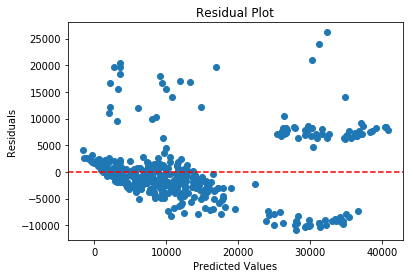

In [69]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

**Conclusion**

A smaller MSE value suggests that the model's predictions are more accurate and closer to the true values.


A larger R-squared value indicates a stronger alignment of the model with the data, resulting in improved predictive performance.